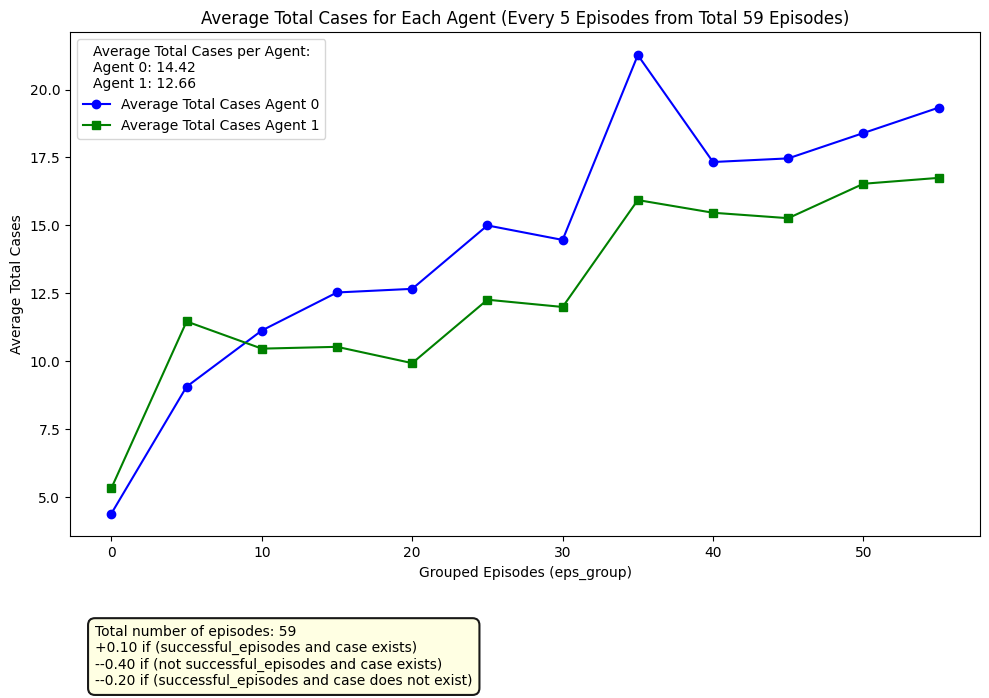

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Folder path containing CSV files in the current directory
folder_path = './'

# Variable to control how many episodes to average together
episodes_per_average = 5

# Initialize an empty list to hold data from all files
all_data_frames = []

# Loop through all CSV files in the specified folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        # Load the data from the CSV file and append to the list
        df = pd.read_csv(file_path)
        all_data_frames.append(df)

# Concatenate all data frames into a single data frame
combined_data = pd.concat(all_data_frames, ignore_index=True)

# Create a new column for grouping episodes in batches
combined_data['eps_group'] = (combined_data['eps'] // episodes_per_average) * episodes_per_average

# Calculate the average values for each group of episodes
average_data = combined_data.groupby('eps_group').mean().reset_index()

# Plot setup with the original legend inside the graph and updated aesthetic legend below the plot
plt.figure(figsize=(10, 6))

# Plot the average 'total_case' for each agent across all grouped episodes
plt.plot(average_data['eps_group'], average_data['total_case_agent_0'], label='Average Total Cases Agent 0', color='b', marker='o')
plt.plot(average_data['eps_group'], average_data['total_case_agent_1'], label='Average Total Cases Agent 1', color='g', marker='s')

# Set chart title and labels with the new title format
total_episodes = combined_data['eps'].max() + 1
plt.title(f"Average Total Cases for Each Agent (Every {episodes_per_average} Episodes from Total {total_episodes} Episodes)")
plt.xlabel('Grouped Episodes (eps_group)')
plt.ylabel('Average Total Cases')

# Keep the original legend inside the graph
average_total_cases_agent_0 = average_data['total_case_agent_0'].mean()
average_total_cases_agent_1 = average_data['total_case_agent_1'].mean()
plt.legend(loc='upper left', title=f'Average Total Cases per Agent:\nAgent 0: {average_total_cases_agent_0:.2f}\nAgent 1: {average_total_cases_agent_1:.2f}')

# Extract non-graphical data for display (averaged across all files)
non_graphical_data = average_data[['inc_success', 'dec_unsuccess', 'dec_success_nocase']].mean().to_dict()

# Combine all additional formatted information into one text block, including the number of episodes
legend_text = (
    f"Total number of episodes: {total_episodes}\n"
    f"+{non_graphical_data['inc_success']:.2f} if (successful_episodes and case exists)\n"
    f"-{non_graphical_data['dec_unsuccess']:.2f} if (not successful_episodes and case exists)\n"
    f"-{non_graphical_data['dec_success_nocase']:.2f} if (successful_episodes and case does not exist)"
)

# Add the combined formatted information below the plot with a single enhanced box and adjust positioning closer to the plot
props = dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='lightyellow', alpha=0.9, linewidth=1.5)
plt.figtext(0.1, -0.15, legend_text, fontsize=10, ha='left', bbox=props)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()
